In [47]:
from spisea import synthetic, evolution
from spisea import atmospheres, reddening
import numpy as np
import pylab as py
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# Define isochrone input parameters
logAge = np.log10(1.7*10**9.) # Age in log(years)
dist = 50000 # distance in parsec
AKs = 0.8 # extinction in Ks-band mags
metallicity = 0.0015 # Metallicity in [M/H]
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()

# Specify filters for synthetic photometry. Here we
# use  the HST WFC3-IR F127M, F139M, and F153M filters
filt_list = ['wfc3,uvis1,f336w', 'wfc3,uvis1,f475w', 'wfc3,uvis1,f814w']

# Specify the directory we want the output isochrone
# table saved in
iso_dir = './isochrones/'

# Make IsochronePhot object
my_iso = synthetic.IsochronePhot(logAge, AKs, dist,
                          
                          evo_model=evo_model,metallicity=0.0015,
                          atm_func=atm_func,
                          red_law=red_law,
                          filters=filt_list,
                          iso_dir=iso_dir)

print(my_iso.points)
print(my_iso.points.meta)
print('The columns in the isochrone table are: {0}'.format(my_iso.points.keys()))

          L                   Teff        ...    m_hst_f814w    
          W                    K          ...                   
---------------------- ------------------ ... ------------------
4.1202412420759625e+23 2904.3714714653606 ...  36.38278218514769
 4.483064716588099e+23  2924.254806167014 ... 36.274810829744666
 4.238323182456118e+23 2912.1689683121485 ...  36.34546697171988
 4.514167853456345e+23 2927.6692929035053 ...  36.26464076279707
4.9093409574963086e+23 2948.2762419744795 ... 36.158622886514415
  5.39445174298615e+23 2971.3640003844457 ...  36.04152304756583
 5.984398394923356e+23 2996.6919448271883 ...  35.91471698253389
 6.757865181189774e+23 3026.1578800823463 ...  35.76413013335998
 7.659070556632296e+23 3056.1817068049663 ... 35.611669647117864
  8.78458923617817e+23 3087.1162239247146 ... 35.448644244675506
                   ...                ... ...                ...
3.2167175976843104e+27    69305.793442726 ...  32.71308289704675
2.9108931994743205e+27  6

Found 6543 stars out of mass range
        mass        isMultiple ...    m_hst_f814w     N_companions
------------------- ---------- ... ------------------ ------------
 0.3117807747656213      False ...  33.58162580592714            0
 0.4168031163971294      False ... 32.804353252786804            0
 0.8071058591929252      False ...  30.05521290481018            0
 0.5023953468175446       True ... 32.005117506005064            1
0.31037884420911377      False ...  33.59274968688858            0
  0.345787992734385      False ... 33.321509093902456            0
 0.3338676047041162      False ...  33.40800469559446            0
 0.2804385735965932      False ...  33.83780992021533            0
0.38922629709321077      False ...  32.98555290983896            0
0.21562563751706984      False ... 34.458351616391184            0
                ...        ... ...                ...          ...
 0.2755697107162687      False ...  33.87848859597032            0
 0.4522859706122758      Fa

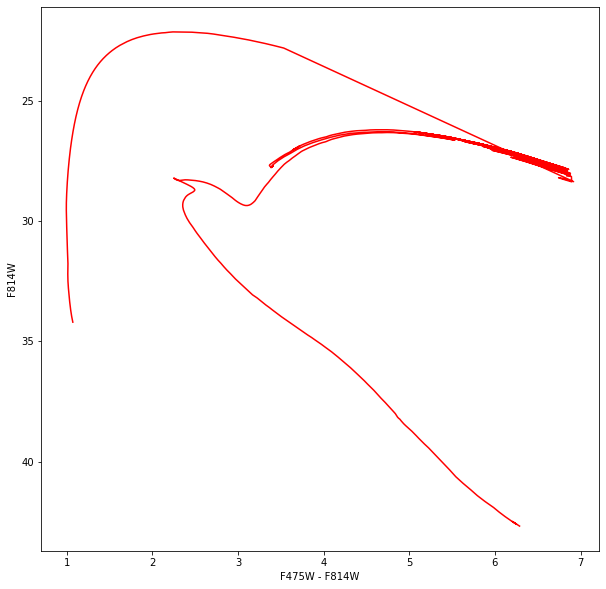

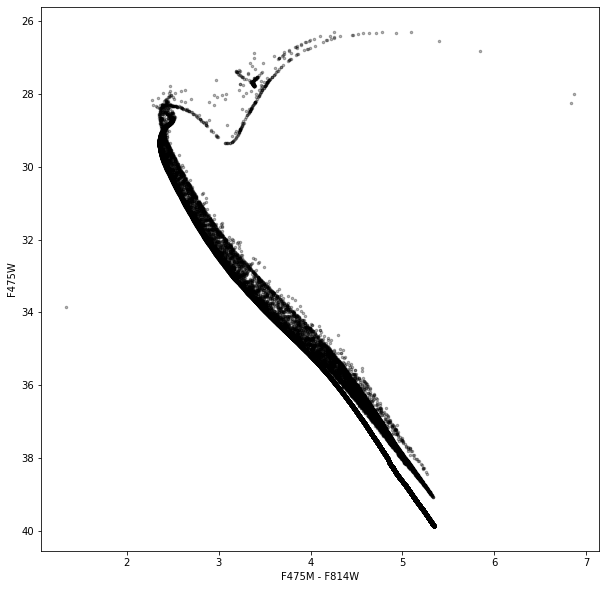

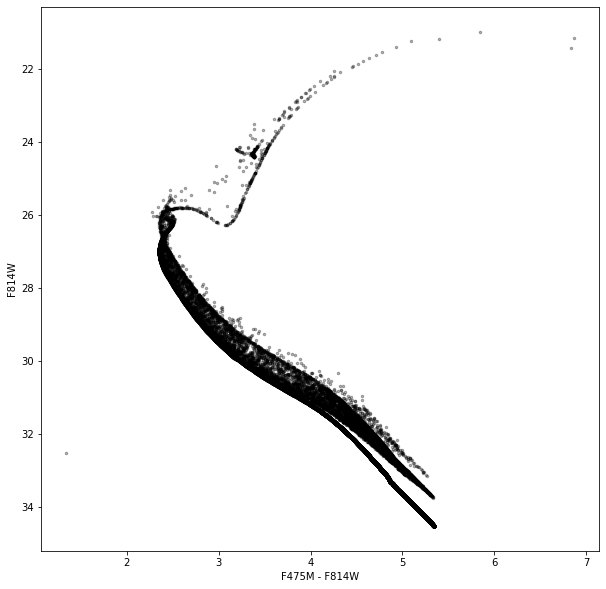

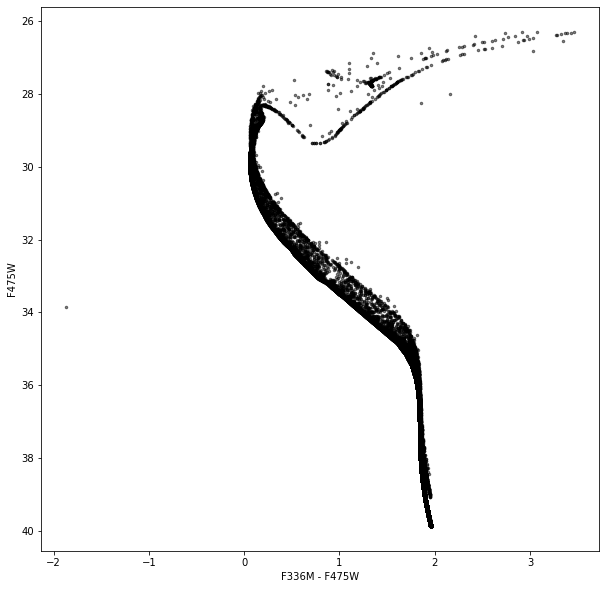

In [49]:
py.figure(1, figsize=(10,10))
py.clf()
py.plot(my_iso.points['m_hst_f475w'] - my_iso.points['m_hst_f814w'], 
       my_iso.points['m_hst_f475w'], 'r-', label='_nolegend_')
#py.plot(my_iso.points['m_hst_f127m'][idx] - my_iso.points['m_hst_f153m'][idx], 
#       my_iso.points['m_hst_f153m'][idx], 'b*', ms=15, label='1 $M_\odot$')
py.xlabel('F475W - F814W')
py.ylabel('F814W')
py.gca().invert_yaxis()
#py.legend()

imf_multi = multiplicity.MultiplicityUnresolved()
massLimits = np.array([0.21, 0.51, 1, 120]) # Define boundaries of each mass segement
powers = np.array([-1.3, -2.3, -2.3]) # Power law slope associated with each mass segment

my_imf = imf.IMF_broken_powerlaw(massLimits, powers, imf_multi)

mass = 10**5.

cluster = synthetic.ResolvedCluster(my_iso, my_imf, mass)
print(cluster.star_systems)
print('The cluster table contains these columns: {0}'.format(cluster.star_systems.keys()))

clust = cluster.star_systems
iso = my_iso.points

py.figure(2, figsize=(10,10))
py.clf()
py.plot(clust['m_hst_f475w'] - clust['m_hst_f814w'], clust['m_hst_f475w'],
       'k.', ms=5, alpha=0.3, label='__nolegend__')
#py.plot(iso['m_hst_f475w'] - iso['m_hst_f814w'], iso['m_hst_f475w'],
#       'r-', label='Isochrone')
py.xlabel('F475M - F814W')
py.ylabel('F475W')
py.gca().invert_yaxis()

py.figure(3, figsize=(10,10))
py.clf()
py.plot(clust['m_hst_f475w'] - clust['m_hst_f814w'], clust['m_hst_f814w'],
       'k.', ms=5, alpha=0.3, label='__nolegend__')
#py.plot(iso['m_hst_f475w'] - iso['m_hst_f814w'], iso['m_hst_f814w'],
#       'r-', label='Isochrone')
py.xlabel('F475M - F814W')
py.ylabel('F814W')
py.gca().invert_yaxis()

py.figure(4, figsize=(10,10))
py.clf()
py.plot(clust['m_hst_f336w'] - clust['m_hst_f475w'], clust['m_hst_f336w'],
       'k.', ms=5, alpha=0.3, label='__nolegend__')
#py.plot(iso['m_hst_f475w'] - iso['m_hst_f814w'], iso['m_hst_f814w'],
#       'r-', label='Isochrone')
py.xlabel('F336M - F475W')
py.ylabel('F336W')
py.gca().invert_yaxis()

py.figure(4, figsize=(10,10))
py.clf()
py.plot(clust['m_hst_f336w'] - clust['m_hst_f475w'], clust['m_hst_f475w'],
       'k.', ms=5, alpha=0.5, label='__nolegend__')
#py.plot(iso['m_hst_f475w'] - iso['m_hst_f814w'], iso['m_hst_f814w'],
#       'r-', label='Isochrone')
py.xlabel('F336M - F475W')
py.ylabel('F475W')
py.gca().invert_yaxis()